# Repeat the paper

## Preprocessing

In [4]:
from img2nii import * # function generate nifti file from images, writen by us
import matplotlib.pylab as plt
#-----------------------

### Original dataset

In [2]:
# read images and labels
# transfer png to nifti file; if not need to save, keep save_nii=False
image_original = img2nii('/home/erjun/mygithub/unet-master/data/membrane/train/image/',save_nii=True,
                 image_prefix='.',save_name = 'training_original',
                save_path='/home/erjun/mygithub/unet-master/data/')
label_original = img2nii('/home/erjun/mygithub/unet-master/data/membrane/train/label/',save_nii=True,
                 image_prefix='.',save_name = 'label_original',
                save_path='/home/erjun/mygithub/unet-master/data/')

# show original image and segmentation
print('Original image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_original[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('original image')
plt.subplot(122)
plt.imshow(label_original[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

### Data augmentation

In [9]:
# Function definition
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import os
import glob
import skimage.io as io
import skimage.transform as trans
def ImageGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,
                   image_color_mode,mask_color_mode,
                   image_save_prefix,mask_save_prefix,
                    flag_multi_class,num_class,
                   save_to_dir,target_size,seed):
    '''
    To generate image and mask
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        shuffle=True,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        shuffle=True,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        yield (img,mask)

2022-04-24 00:59:42.162580: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/erjun/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-24 00:59:42.162593: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
# Data augmentation
os.chdir('/home/erjun/mygithub/unet-master/data/membrane/train/aug/')
!rm *.png
os.chdir('/home/erjun/mygithub/unet-master/')
data_gen_args = dict(rotation_range=70,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')
Image_generated = ImageGenerator(batch_size=10,train_path='data/membrane/train',
               image_folder='image',mask_folder='label',aug_dict=data_gen_args,
               image_color_mode = "grayscale",mask_color_mode = "grayscale",
               image_save_prefix  = "image",mask_save_prefix  = "mask",
                     flag_multi_class = False,num_class = 2,
               save_to_dir = "data/membrane/train/aug",target_size=(388,388),seed = 1)
num_batch = 30
for i,batch in enumerate(Image_generated):
    if(i >= num_batch):
        break

rm: cannot remove '*.png': No such file or directory
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


Original image and segmentation


Text(0.5, 0, 'image label')

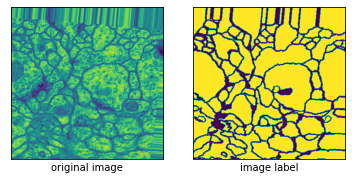

In [13]:
image_aug = img2nii('/home/erjun/mygithub/unet-master/data/membrane/train/aug/',save_nii=True,
                 image_prefix='image',save_name = 'training_aug',
                save_path='/home/erjun/mygithub/unet-master/data/')
label_aug = img2nii('/home/erjun/mygithub/unet-master/data/membrane/train/aug/',save_nii=True,
                 image_prefix='mask',save_name = 'label_aug',
                save_path='/home/erjun/mygithub/unet-master/data/')

# show augmentated image and segmentation
print('Original image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_aug[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('original image')
plt.subplot(122)
plt.imshow(label_aug[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

### Data nomalization

In [15]:
# Function definition
import cv2
import os
from dipy.io.image import load_nifti, save_nifti
import nibabel as nib
import numpy as np
def imgNormlize(folder,image_prefix,mask,save_path):
    '''
    normalize images
    '''
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        if np.max(img) > 1:
            if (img is not None) and (mask==False):
                img = img/255.0
            elif (img is not None) and (mask==True):
                img = img /255
                img[img > 0.5] = 1
                img[img <= 0.5] = 0
            cv2.imwrite(os.path.join(save_path,filename), img)

Normalized image and segmentation


Text(0.5, 0, 'image label')

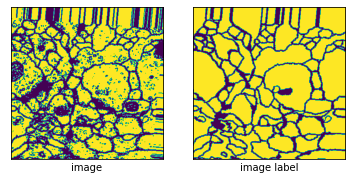

In [16]:
# Data normalization
imgNormlize(folder='/home/erjun/mygithub/unet-master/data/membrane/train/aug/',image_prefix='image',mask=False,
            save_path='/home/erjun/mygithub/unet-master/data/membrane/train/aug/')
imgNormlize(folder='/home/erjun/mygithub/unet-master/data/membrane/train/aug/',image_prefix='mask',mask=True,
            save_path='/home/erjun/mygithub/unet-master/data/membrane/train/aug/')

image_norm = img2nii('/home/erjun/mygithub/unet-master/data/membrane/train/aug/',save_nii=True,
                 image_prefix='image',save_name = 'training_norm',
                save_path='/home/erjun/mygithub/unet-master/data/')
label_norm = img2nii('/home/erjun/mygithub/unet-master/data/membrane/train/aug/',save_nii=True,
                 image_prefix='mask',save_name = 'label_norm',
                save_path='/home/erjun/mygithub/unet-master/data/')

# show normalized image and segmentation
print('Normalized image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_norm[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image')
plt.subplot(122)
plt.imshow(label_norm[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

### Image padding

In [18]:
# Function definition
import cv2
import os
from dipy.io.image import load_nifti, save_nifti
import nibabel as nib
import numpy as np
def imgPadding(folder,mode,size,save_path):
    '''
    padding images
    '''
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        px = int((size[0]-img.shape[0])/2)
        py = int((size[1]-img.shape[1])/2)
        img_padded = np.pad(img, (px,py), mode)
        cv2.imwrite(os.path.join(save_path,filename), img_padded)

padded image and segmentation


Text(0.5, 0, 'image label')

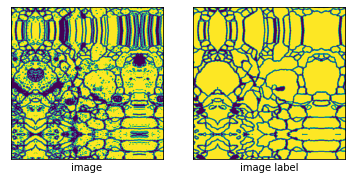

In [19]:
# Image padding
os.chdir('/home/erjun/mygithub/unet-master/data/membrane/train/aug_mirror/')
!rm *.png
imgPadding(folder='/home/erjun/mygithub/unet-master/data/membrane/train/aug/',
            mode='symmetric',size=[572,572],
            save_path='/home/erjun/mygithub/unet-master/data/membrane/train/aug_mirror/')


image_padded = img2nii('/home/erjun/mygithub/unet-master/data/membrane/train/aug_mirror/',save_nii=True,
                 image_prefix='image',save_name = 'training_padded',
                save_path='/home/erjun/mygithub/unet-master/data/')
label_padded = img2nii('/home/erjun/mygithub/unet-master/data/membrane/train/aug_mirror/',save_nii=True,
                 image_prefix='mask',save_name = 'label_padded',
                save_path='/home/erjun/mygithub/unet-master/data/')
# show original image and segmentation
print('padded image and segmentation')
plt.figure()
plt.subplot(121)
plt.imshow(image_padded[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image')
plt.subplot(122)
plt.imshow(label_padded[:,:,0])
plt.xticks([])
plt.yticks([])
plt.xlabel('image label')

## UNet model in the paper

### UNet model constructions

In [20]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import tensorflow as tf

In [21]:
def conv2ds_pool(inputs,channels,kernel,strides,activation,padding,crop_size):
    '''
    example: conv2ds(inputs,channels,kernel=3,strides=1,activation='relu',padding='same')
    '''
    conv1 = Conv2D(filters=channels, kernel_size=kernel, strides=strides,activation = activation, 
                   padding = padding, kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(filters=channels, kernel_size=kernel, strides=strides,activation = activation, 
                   padding = padding, kernel_initializer = 'he_normal')(conv1)
    copy_crop1 = CenterCrop(crop_size[0], crop_size[1])(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    return pool1,copy_crop1,conv1

def deconv2ds_pool(copy_crop,conv2d,channels,kernel,strides,activation,padding):
    '''
    example: conv2ds(inputs,channels,kernel=3,strides=1,activation='relu',padding='same')
    '''
    drop_prob = 0.5
    conv0_up = Conv2DTranspose(filters=int(channels*(1-drop_prob)), kernel_size=2, strides=2,
                   activation = activation, output_padding=None,
                   padding = 'valid')(conv2d)
    concate1 = concatenate([copy_crop,conv0_up], axis = 3)
    
    drop1 = concate1#Dropout(drop_prob)(concate1)
    conv1 = Conv2D(filters=int(channels*(1-drop_prob)), kernel_size=kernel, strides=strides,
                   activation = activation, 
                   padding = padding, kernel_initializer = 'he_normal')(drop1)
    conv1 = Conv2D(filters=int(channels*(1-drop_prob)), kernel_size=kernel, strides=strides,
                   activation = activation, 
                   padding = padding, kernel_initializer = 'he_normal')(conv1)
    pool1 = conv1#MaxPooling2D(pool_size=(2, 2))(conv1)
    return pool1

In [22]:
def UNet2d(pretrained_weights=None,input_size=(388,388,1)):
    '''
    example: UNet2d(pretrained_weights = None,input_size = (388,388,1))
    '''
    inputs = Input(input_size)
    img_padded = tf.pad(tensor=inputs, paddings=[[0, 0],[92,92],[92,92],[0,0]],
                        mode="SYMMETRIC",name='Padding')
    #-----------------------------------------------------------
    conv2ds_l1,copy_crop_l1,conv_l1 = conv2ds_pool(inputs=img_padded ,channels=64,kernel=3,strides=1,activation='relu',
                                           padding='valid',crop_size=[392,392])
    conv2ds_l2,copy_crop_l2,conv_l2 = conv2ds_pool(inputs=conv2ds_l1,channels=128,kernel=3,strides=1,activation='relu',
                                           padding='valid',crop_size=[200,200])
    conv2ds_l3,copy_crop_l3,conv_l3 = conv2ds_pool(inputs=conv2ds_l2,channels=256,kernel=3,strides=1,activation='relu',
                                           padding='valid',crop_size=[104,104])
    conv2ds_l4,copy_crop_l4,conv_l4 = conv2ds_pool(inputs=conv2ds_l3,channels=512,kernel=3,strides=1,activation='relu',
                                           padding='valid',crop_size=[56,56])
    conv2ds_l5,copy_crop_l5,conv_l5 = conv2ds_pool(inputs=conv2ds_l4,channels=1024,kernel=3,strides=1,activation='relu',
                                           padding='valid',crop_size=[28,28])
    #------------------------------------------------------------
    deconv2ds_l6 = deconv2ds_pool(copy_crop=copy_crop_l4,conv2d=conv_l5,channels=1024,
                                  kernel=3,strides=1,activation='relu',padding='valid')
    deconv2ds_l7 = deconv2ds_pool(copy_crop=copy_crop_l3,conv2d=deconv2ds_l6,channels=512,
                                  kernel=3,strides=1,activation='relu',padding='valid')
    deconv2ds_l8 = deconv2ds_pool(copy_crop=copy_crop_l2,conv2d=deconv2ds_l7,channels=256,
                                  kernel=3,strides=1,activation='relu',padding='valid')
    deconv2ds_l9 = deconv2ds_pool(copy_crop=copy_crop_l1,conv2d=deconv2ds_l8,channels=128,
                                  kernel=3,strides=1,activation='relu',padding='valid')
    conv10 = Conv2D(filters=1, kernel_size=1, strides=1,activation = 'sigmoid', 
                       padding = 'valid')(deconv2ds_l9)
    #------------------------------------------------------------
    model = Model(inputs = inputs, outputs = conv10,name='UNet')
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    model.summary()
    if(pretrained_weights):
    	model.load_weights(pretrained_weights)
    return model

## UNet training and prediction

In [24]:
model = UNet2d()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1,
                                   save_best_only=True)
# imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
imgs_train = image_norm.swapaxes(1,2).swapaxes(0,1)
imgs_mask = label_norm.swapaxes(1,2).swapaxes(0,1)
model.fit(imgs_train, imgs_mask, batch_size=10, epochs=15, verbose=1,validation_split=0.2,
          shuffle=True, callbacks=[model_checkpoint])

Model: "UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 388, 388, 1  0           []                               
                                )]                                                                
                                                                                                  
 tf.compat.v1.pad_1 (TFOpLambda  (None, 572, 572, 1)  0          ['input_2[0][0]']                
 )                                                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 570, 570, 64  640         ['tf.compat.v1.pad_1[0][0]']     
                                )                                                              

 conv2d_33 (Conv2D)             (None, 198, 198, 12  295040      ['concatenate_6[0][0]']          
                                8)                                                                
                                                                                                  
 conv2d_34 (Conv2D)             (None, 196, 196, 12  147584      ['conv2d_33[0][0]']              
                                8)                                                                
                                                                                                  
 center_crop_5 (CenterCrop)     (None, 392, 392, 64  0           ['conv2d_20[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_7 (Conv2DTran  (None, 392, 392, 64  32832      ['conv2d_34[0][0]']              
 spose)   

## Prediction

# Exp. 1: change mirror-tile technique to zero padding

# Exp. 2: Apply UNet model on human brain segmentation